**Общие положения**

**Обработка изображений** -  это процесс анализа и работы с цифровым изображением, направленный на улучшение качества картинки или извлечения информации для дальнейшего использования.

С помощью графики в `Python` можно рисовать фигуры и изображения, создавать анимацию, визуализировать математические вычисления в Python. 

**PIL (Python Imaging Library)  / Pillow** -  это бесплатная Python-библиотека для открытия, работы и сохранения различных форматов изображений. Она предназначена для быстрого доступа к данным, хранящимся в нескольких основных пиксельных форматах.

***Растровые изображения*** представляют собой массив (таблицу) пикселей разных цветов. 

***Пиксели*** — минимальные единицы изображения, для которых можно определить цвет.

Для преобразования цветов в целые числа воспользуемся одной из самых популярных моделей представления цвета — RGB (Red, Green, Blue).

В модели RGB каждый из цветов представляется совокупностью трех компонентов: красного, синего и зеленого. Значение каждого компонента лежит в диапазоне от 0 (минимум) до 255 (максимум), занимая 1 байт в памяти. Итак, каждый цвет — совокупность трех целых чисел. Сумма этих трех чисел говорит о яркости пикселя: чем сумма больше, тем пиксель кажется ярче.

Например,
- (0, 0, 0) — черный цвет. Его яркость минимальна, оттенков нет.
- (255, 255, 255) — белый, максимальная яркость
- (255, 0, 255) — очень насыщенный пурпурный (красный + синий)
- (255, 255, 0) — ярко-желтый (красный + зеленый)

<img src="https://sun9-80.userapi.com/impg/2xBs8Mg65RMdAI2cN7YjJcFRZ5PHBwMyvF6QDg/GeYLBIyYgOA.jpg?size=514x584&quality=96&sign=ed1b7deb6a5724c0665b50c2b56ff475&type=album" title=""/>

Рассмотрим пример работы с изображением, в котором:
1. Отобразим загруженное изображение.
2. Пройдем по каждому пикселю в изображении.
3. Получим для него значение цвета в RGB-нотации.
4. Присвоим этому пикселю новое значение цвета (поменяем составляющие).

Для работы потребуется файл с изображением — ris1.jpg, который храниться в том же каталоге, где будут лежать программы по его обработке.
Для работы с изображением используется объект Image, который находится в библиотеке PIL (пишется большими буквами). Также могут быть использованы библиотеки Matplotlib и Numpy.


In [4]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# img = plt.imread('ris1.jpg')
img_1 = plt.imread('example1.png')

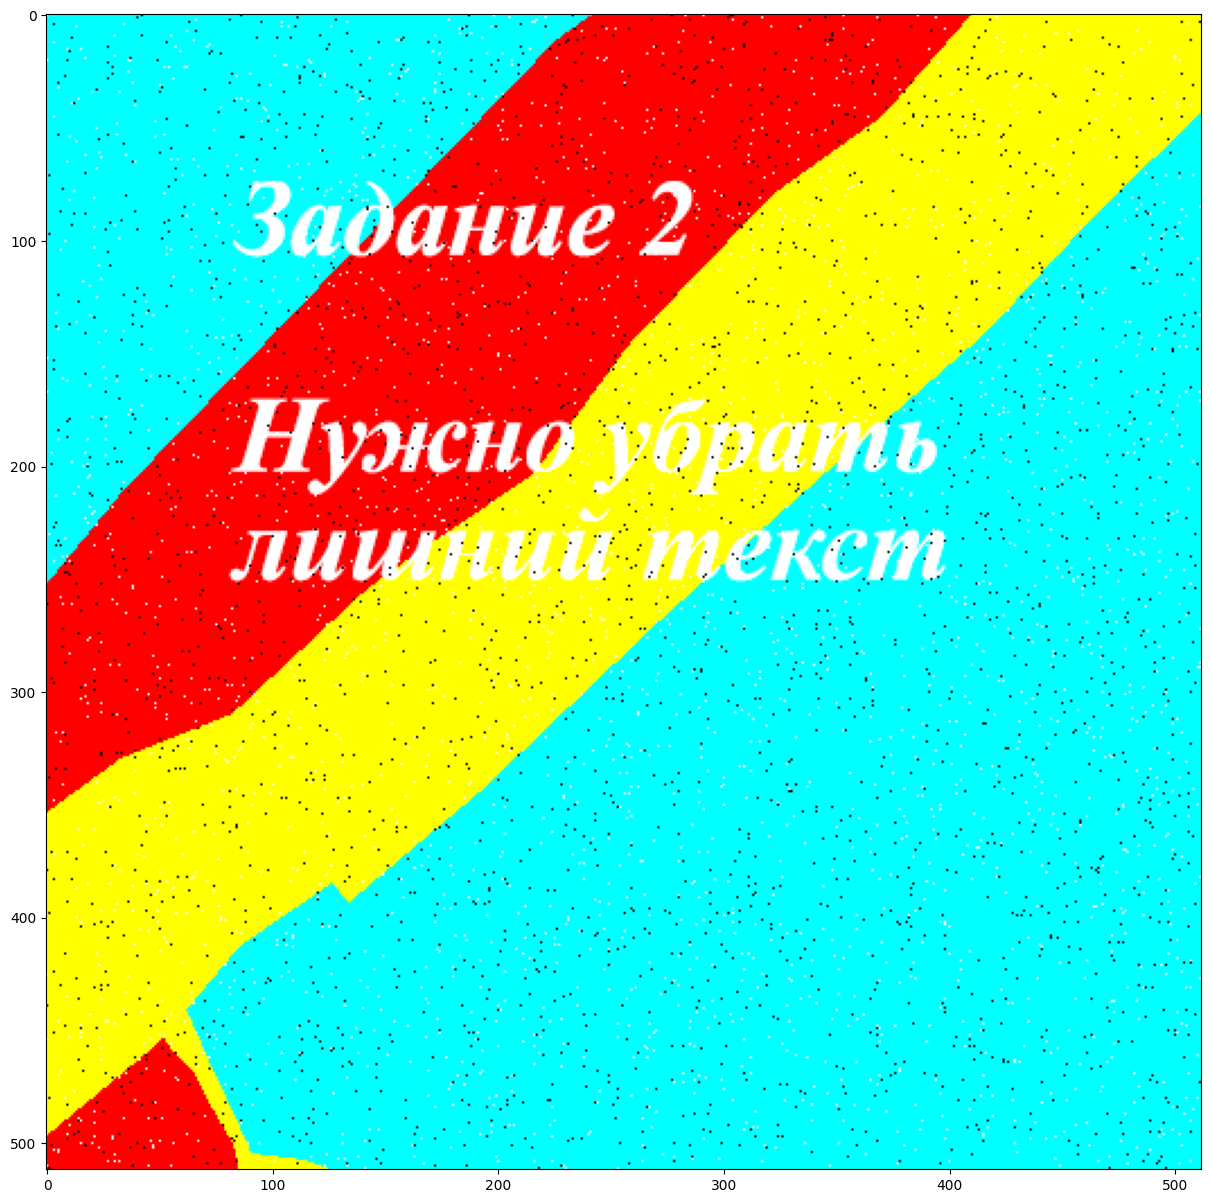

In [6]:
# Отобразим загруженное изображение
plt.figure(figsize=(15,15))
plt.imshow(img_1)

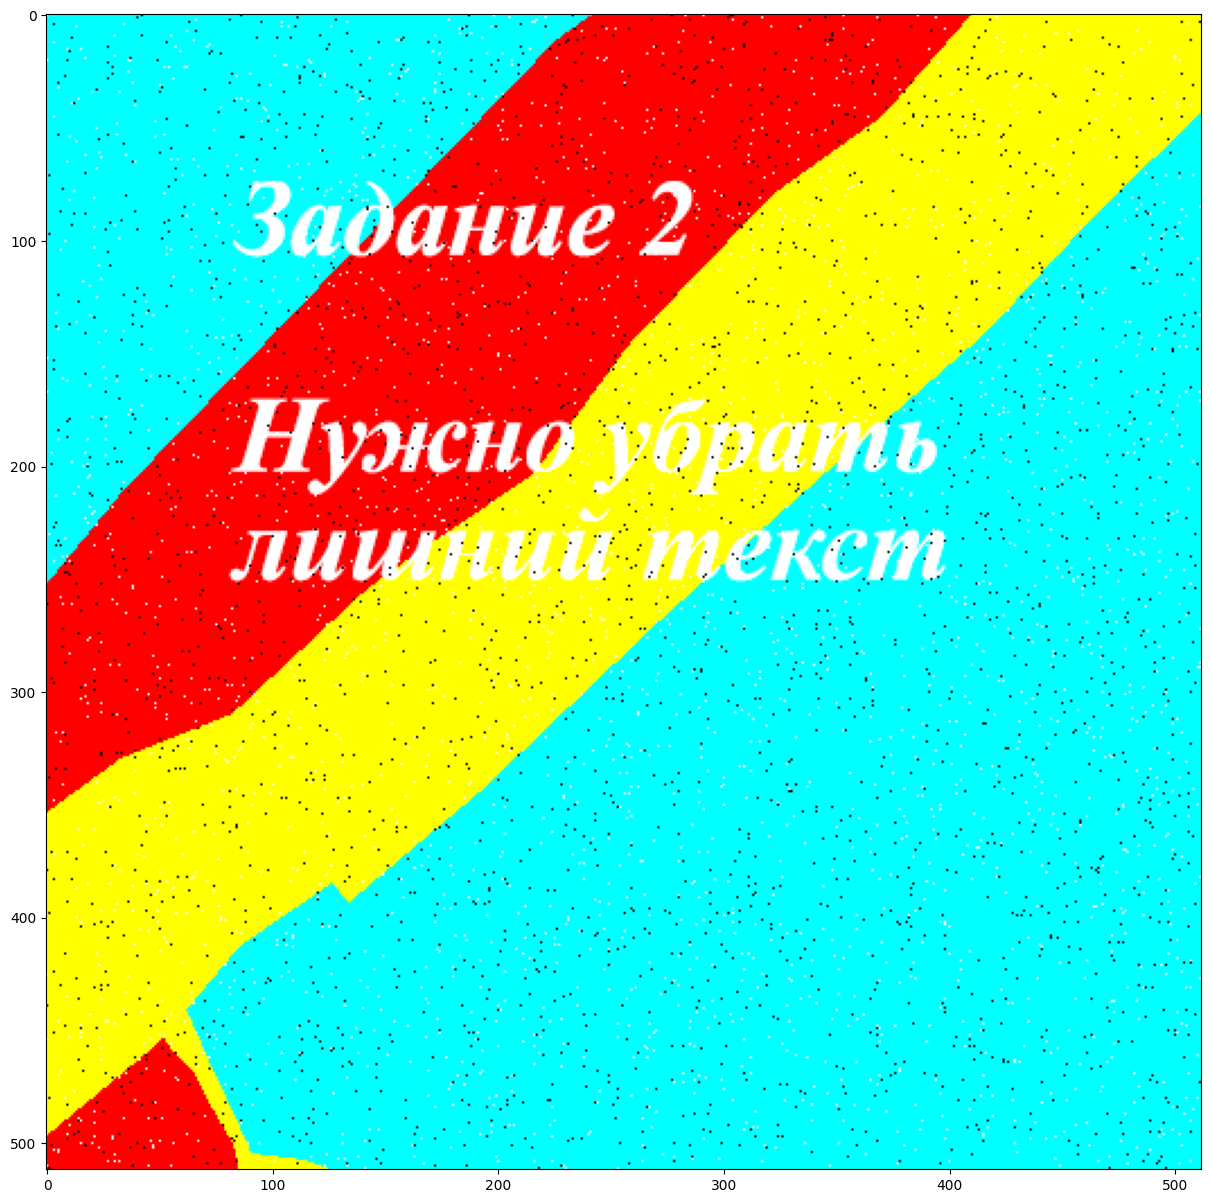

In [7]:
#Пройдем по каждому пикселю в изображении.
x, y, z = img_1.shape # высота (x), ширина (y) и количество каналов (z) изображения, 
img_2 = img_1.copy()
for i in range(x):
    for j in range(y):
        r, g, b = img_2[i, j] #Получим для него значение цвета в RGB-нотации.
        img_2[i, j] = r, g, b #Присвоим этому пикселю новое значение цвета (поменяем составляющие).

plt.figure(figsize=(15,15))
plt.imshow(img_2)

В функции `imread` в скобках указывается или абсолютный путь к файлу, или
просто имя файла, если файл размещен в том же каталоге, что и сама программа. Таким образом получаем массив пикселей этого изображения, где каждый пиксель представляет собой три значения (по одному значению на канал) — цвет пикселя в палитре RGB.

С помощью атрибута `shape` объекта `img` мы можем получить размер изображения,
который хранится в виде кортежа: сначала ширину в пикселях, потом высоту в пикселях и количество каналов изображения, что соответствует размерности `img`. 
Для того чтобы создать новое изображение из исходного, создадим копию исходного и назовём её `img_2`.

Далее переберем все элементы `img_2` (двумя циклами for) и для каждого элемента получим значение трех компонентов цвета. Запишем в массив `img_2` эти значения, но изменив порядок значений.

Для получения трех компонентов цвета каждого пикселя используем множественное присваивание, поэтому пишем
```Python
r, g, b = img_2[i, j]
```
вместо
```Python
pixel = img_2[i, j]
r = pixel[0]
g = pixel[1]
b = pixel[2]
```
Затем при помощи функции `imshow` отображаем измененный массив пикселей как изображение.
В данном случае появляется новая картинка. Исходное изображение осталось без изменений, а новое получено из исходного изменением значений цветовых компонентов для каждого пикселя.

Другой пример:

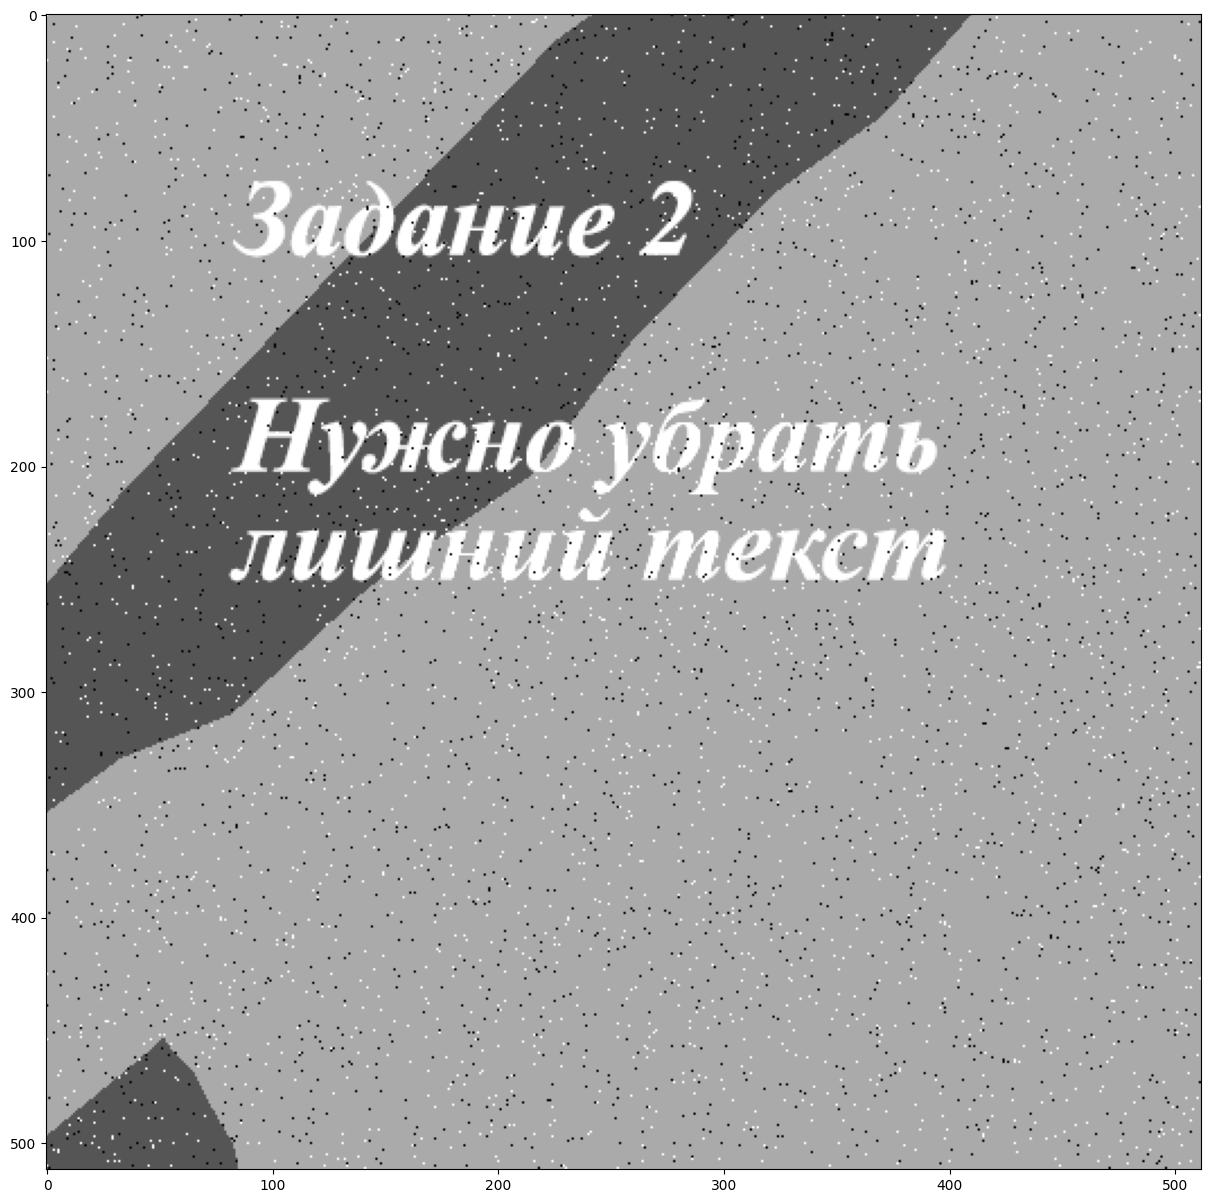

In [8]:
x, y, z = img_1.shape
img_21 = np.zeros((x,y,1))  # Подготавливаем массив для формирования результирующего изображения
for i in range(x):
    for j in range(y):
        r, g, b = img_1[i, j] #Получим значение цвета в RGB.
        if r == 150 and g == 150 and b == 150: # в зависимости от выполнения заданных условий, 
            img_21[i, j] = 255, 255, 255                  # в результирующем изображении пикселям происваиваются необходимые значения 
        elif (int(r) + int(g) + int(b)) <= 254: 
            img_21[i, j] = r + g + b
        else:
            img_21[i, j] = 1
 
plt.figure(figsize=(15,15))
plt.imshow(img_21)
plt.imshow(img_21, cmap='gray')

**Фильтры**

Фильтр можно воспринимать как любое преобразование заданного изображения. Чтобы добиться лучшего эффекта, их можно накладывать последовательно.

Полутоновое изображение (в градациях серого) содержит только информацию о яркости, но не о цветах. У таких изображений все три компоненты имеют одинаковое значение, поэтому мы можем просто «размазать» суммарную яркость пикселя поровну по трем компонентам.
```python
for i in range(x):
    for j in range(y):
        r, g, b = img[i, j]
        bw = (r + g + b) // 3
        img[i, j] = bw, bw, bw
```
Можно сказать, что слили содержимое контейнеров R, G, B в одну емкость,
а затем разлили обратно, но уже поровну в каждый контейнер. Суммарная яркость
пикселя осталась прежней, но информация о цвете не сохранилась. Также обычно полутоновые изображения имеют только один канал, так как в остальных каналах в таком случае значения дублируются и не несут в себе никакой дополнительной информации.  

**Негатив**

Например, белые пиксели изображения (255) в позитиве, становятся в негативе 
черными (0) и наоборот. То есть для значения х негативом будет 255 — x.
```python
for i in range(x):
    for j in range(y):
        r, g, b = img[i, j]
        img[i, j] = 255 - r, 255 - g, 255 - b
```
**Высветление** 

«Высветлить» означает увеличить значения всех цветовых компонентов на какой-то коэффициент. Важно помнить, что эти значения не могут быть больше 255.
```python
def curve(pixel):
    r, g, b = pixel
    brightness = r + g + b if r + g + b > 0 else 1
    if brightness < 60:
        k = 60 / brightness
        return min(255, int(r * k ** 2)), min(255, int(g * k ** 2)), min(255, int(b * k ** 2))
    else:
        return r, g, b

for i in range(x):
    for j in range(y):
        img[i, j] = curve(img[i, j])
```

Вы можете преобразовать этот массив в изображение, используя Image.fromarray() в Pillow:
```Python
img = Image.fromarray(img)
```
В библиотеке PIL реализовано много встроенных фильтров и инструментов для изменения изображений (вырезание, изменение размеров и т. д.).

**Изменение размера изображения** с помощью функции `resize`, в которую
кортежем передается новый размер изображения. 
<div class="alert alert-block alert-info">
<b>Обратите внимание:</b> все подобные
функции не изменяют исходное изображение, а возвращают его измененную копию.</div>

```Python
img = Image.open("1.jpg")
img2 = img.resize((100, 100))
```
**Вырезание прямоугольной части изображения** с помощью функции `crop`. В функцию передаются координаты верхнего левого и правого нижнего угла вырезаемого прямоугольника одним кортежем.
```python
im = Image.open("1.jpg")
im2 = img.crop((200, 200, 500, 500))
```
Для **сокращения цветов в палитре изображения** и создания миниатюр для
предпросмотра используется функция `quantize`. Принимает на вход число меньшее
256 — количество цветов.
<div class="alert alert-block alert-info">
<b>Обратите внимание:</b> эта функция также преобразовывает изображение в формат bmp.</div>

```python
im = Image.open("1.jpg")
im2 = img.quantize(16)
```
**Повороты и отражения изображения** можно выполнить с помощью
функции `transpose`, в которую передается тип преобразования. Это может быть
отражение слева направо, или сверху вниз, или повороты на 90, 180 или
270 градусов.
```python
im = Image.open("2.jpg")
im2 = im.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.ROTATE_90)
# Image.FLIP_LEFT_RIGHT,
# Image.FLIP_TOP_BOTTOM,
# Image.ROTATE_90,
# Image.ROTATE_180,
# Image.ROTATE_270
```
Все параметры поворота, представленные выше, определяют повороты с шагом в 90 градусов. Если вам нужно повернуть изображение на другой угол, вы можете использовать `.rotate()`:
```python
rotated_img = img.rotate(45)
```
Данный объект Image имеет тот же размер, что и исходное изображение. Поэтому на дисплее отсутствуют углы картинки. Вы можете изменить это поведение с помощью расширенного именованного параметра. Этот метод возвращает увеличенное изображение, полностью содержащее повернутое изображение:
```python
rotated_img = img.rotate(45, expand=True)
```
В дополнение к модулю `Image` вы также можете импортировать модуль `ImageFilter` из `Pillow`. Вы можете использовать метод `.filter()` для применения фильтрации к изображению. Этот метод требует ядра свертки в качестве аргумента. Далее представлен набор фильтров, который касается **размытия, повышения резкости и сглаживания изображения**.

Вы можете размыть изображение с помощью фильтра ImageFilter.BLUR:
```python
blur_img = img.filter(ImageFilter.BLUR)
```
Вы можете настроить необходимый тип и степень размытия, используя ImageFilter.BoxBlur() или ImageFilter.GaussianBlur():
```python
img.filter(ImageFilter.BoxBlur(5))
img.filter(ImageFilter.BoxBlur(20))
img.filter(ImageFilter.GaussianBlur(20)
```
Для фильтра `.BoxBlur()` аргументом является радиус фильтра размытия прямоугольника. Фильтр рамочного размытия 3x3 имеет радиус 1, потому что фильтр простирается на один пиксель от центра. Прямоугольный фильтр размытия с радиусом 20 создает более размытое изображение, чем изображение, сгенерированное прямоугольным фильтром размытия с радиусом 5.

Вы также можете использовать фильтр `.GaussianBlur()`, который использует ядро размытия по *Гауссу*. Ядро *Гаусса* придает больший вес пикселям в центре ядра, чем по краям, и это приводит к более плавному размытию, чем то, что получается с размытием прямоугольника. По этой причине во многих случаях размытие по *Гауссу* может дать лучшие результаты.

Для повышения резкости изображения предназначен фильтр `ImageFilter.SHARPEN`:
```python
sharp_img = img.filter(ImageFilter.SHARPEN)
```
**Морфологические операции**

**Сжатие(erosion)** — это процесс удаления белых пикселей с границ изображения. Вы можете добиться этого в двоичном изображении, используя `ImageFilter.MinFilter(3)` в качестве аргумента для метода `.filter()`.
```python
img = img.filter(ImageFilter.MinFilter(3))
```
**Дилатация** – процесс, противоположный эрозии. Белые пиксели добавляются к границам бинарного изображения. Вы можете добиться расширения с помощью `ImageFilter.MaxFilter(3)`, который преобразует пиксель в белый, если любой из его соседей белый.
```python
 img = img.filter(ImageFilter.MaxFilter(3))
```
Благодаря тому, что преобразование возвращает измененное изображение,
можно создавать цепочки преобразований.
<div class="alert alert-block alert-info">
<b></b> Библиотека PIL содержит в себе много интересных функций, смотрите
документацию к библиотеке.</div>


**Задание**

Написать программу, которая принимает на вход изображение маски сегментации местности, на которой присутствует лишний текст. Программа должна выдавать результирующее изображение, предстовляющеее собой исходное изображение, на котором отсутствует лишний текст. Если на исходном изображении также присутствует шум, его необходимо убрать. Пример исходного и результирующего изображения, представлен ниже. 

**Исходное изображение**

<img src="https://sun9-66.userapi.com/impg/DM_3uvY6tlsGBZQX2pwdw1qOTxicAcJPz404ZA/KgCC_aCFs8A.jpg?size=512x512&quality=96&sign=fa30df5a8283fde2731cec724bf05ebb&type=album" title="Исходное изображение"/>

**Результирующее изображение**

<img src="https://sun9-18.userapi.com/impg/f8JpV21-g0EJYJiQ6NFHJxjkKv1fOqXnvQl7Yg/XEll-ocDAp8.jpg?size=512x512&quality=96&sign=6d88d335244ee6fb1d549777fc2764cd&type=album" title="Результирующее изображение"/>

Для выполнения задания предлагается использовать медианный фильтр. 

Для этого могут быть полезны следующие функции библиотеки numpy:

`np.sort()` - сортирует элементы по возрастанию на заданной оси массива.  
`np.reshape()` - распределяет элементы массива в заданный размер.  
`np.сopy()` - создаёт копию массива.  
`np.zeros()` - создаёт массив заполненый нулями необходимого размера.  
`np.zeros_like()` - создаёт массив заполненый нулями такого же размера как и массив поданный на функцию.  

Примеры:

In [9]:
test_array = np.random.randint(0,10,(4,4))
test_array

array([[6, 3, 2, 9],
       [0, 9, 8, 4],
       [9, 9, 3, 8],
       [9, 3, 6, 5]])

In [10]:
np.sort(test_array, axis=1)

array([[2, 3, 6, 9],
       [0, 4, 8, 9],
       [3, 8, 9, 9],
       [3, 5, 6, 9]])

In [11]:
np.reshape(test_array, (2,-1))

array([[6, 3, 2, 9, 0, 9, 8, 4],
       [9, 9, 3, 8, 9, 3, 6, 5]])

In [12]:
np.copy(test_array)

array([[6, 3, 2, 9],
       [0, 9, 8, 4],
       [9, 9, 3, 8],
       [9, 3, 6, 5]])

In [13]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
np.zeros_like(test_array)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [15]:
# img_1 = plt.imread('example1.png')
img_1 = Image.open('example1.png')


# img_2 = plt.imread('example2.png')
img_2 = Image.open('example2.png')

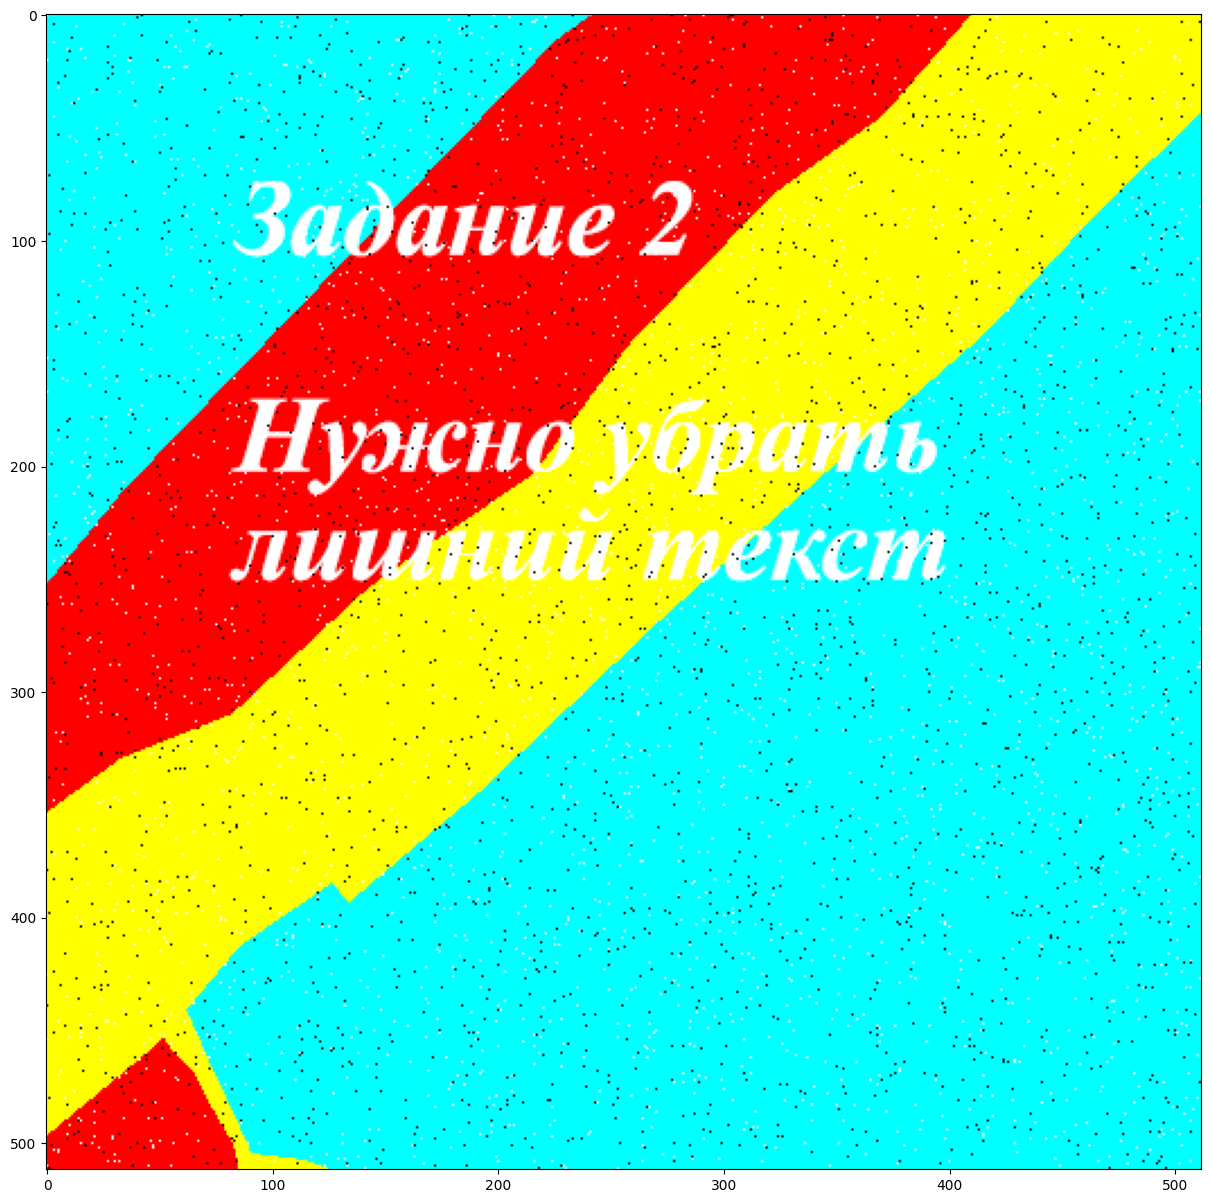

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(img_1)

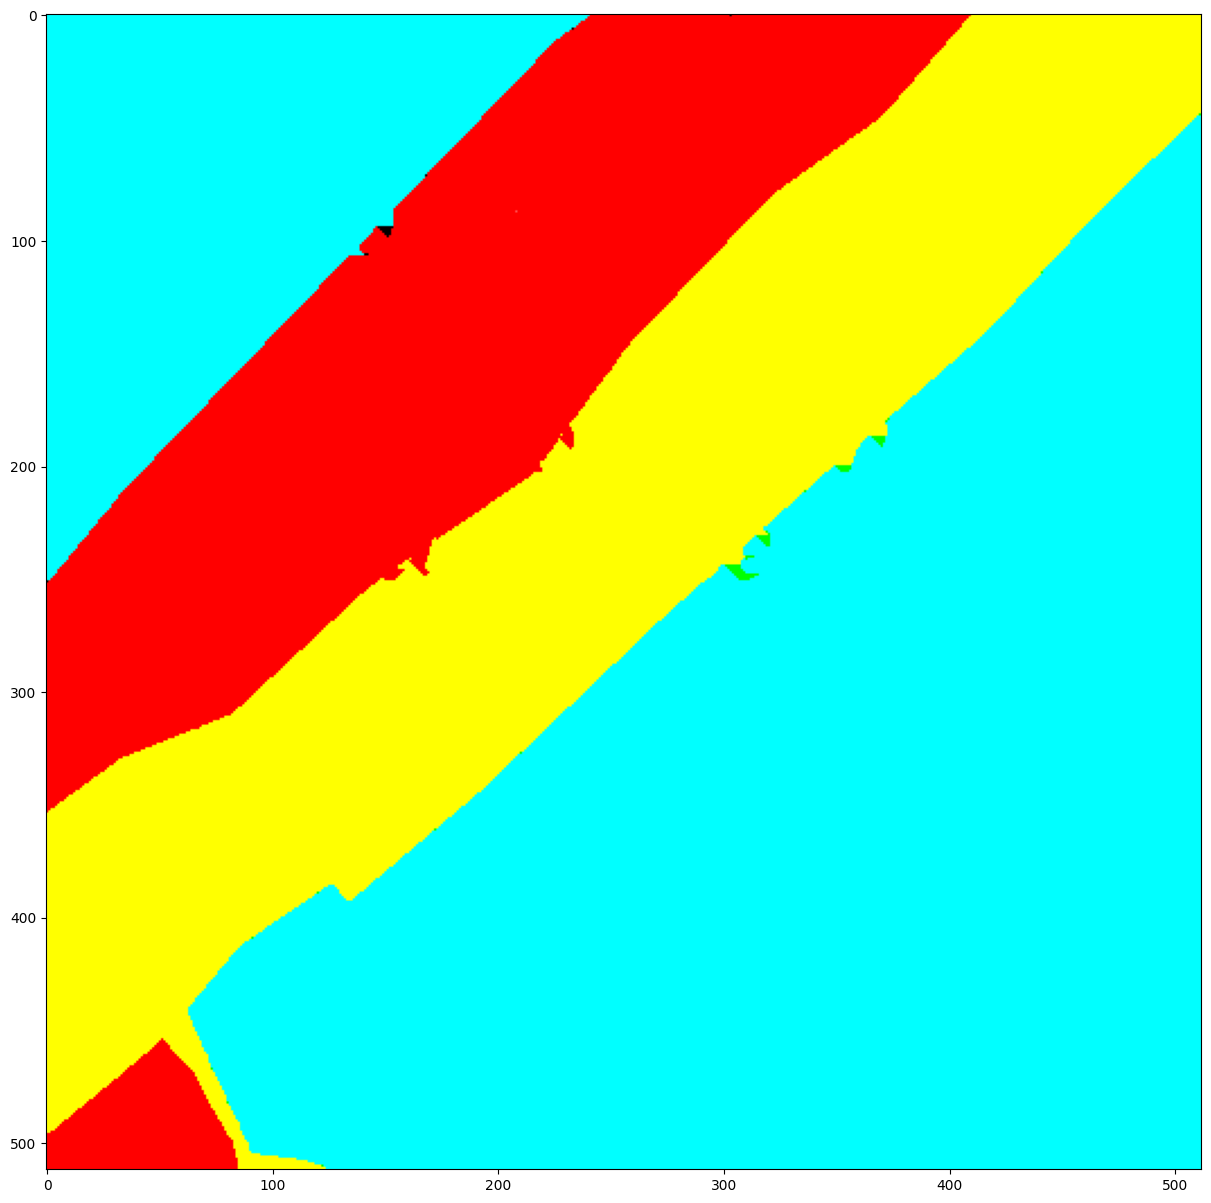

In [17]:
# img_1 = img_1.filter(ImageFilter.MaxFilter)
# plt.imshow(img_1)

img_1_filter = img_1.filter(ImageFilter.SHARPEN)
img_1_filter = img_1_filter.filter(ImageFilter.ModeFilter(size = 3))
np_img_1 = np.array(img_1_filter) 
x, y, z = np_img_1.shape
# print(np_img.shape)
img_1_copy = np.zeros_like((img_1_filter))  # Подготавливаем массив для формирования результирующего изображения

for i in range(x):
    for j in range(y):
        # img_2_copy = np.array(img_2_copy)
        r, g, b = np_img_1[i, j] #Получим значение цвета в RGB.
        # img_2_copy[i, j] = r, g, b
        if (r == 255) and (g == 255) and (b == 255): # в зависимости от выполнения заданных условий, в результирующем изображении пикселям происваиваются необходимые значения 
            # print(f'red: {r}\ngreen: {g}\nblue: {b}')
            a, b, c = img_1_copy[i-1:i+2,j-1:j+2]
            # a, b, c = (img_2_copy[i, j])
            # print(img_2_copy[i-1:i+2,j-1:j+2])
            # print((np_img[i-1:i+2,j-1:j+2]))
            # print(f'a: {a}\nb: {b}\nc: {c}\n')
            # print('minimum')
            # print(np.minimum(a, np.minimum(b, c))[0])
            img_1_copy[i, j] = (np.minimum(a, b))[0]
            # img_2_copy[i, j] = 0, 0, 255

        else:
            img_1_copy[i, j] = r, g, b

plt.figure(figsize=(15,15))
plt.imshow(img_1_copy)
# img_1_gray = img_1_filter.convert("L")
# plt.imshow(img_1_gray, cmap='gray')
# img_1_the = img_1_gray.point(lambda x: 255 if x > 100 else 0)
# plt.imshow(img_1_the)



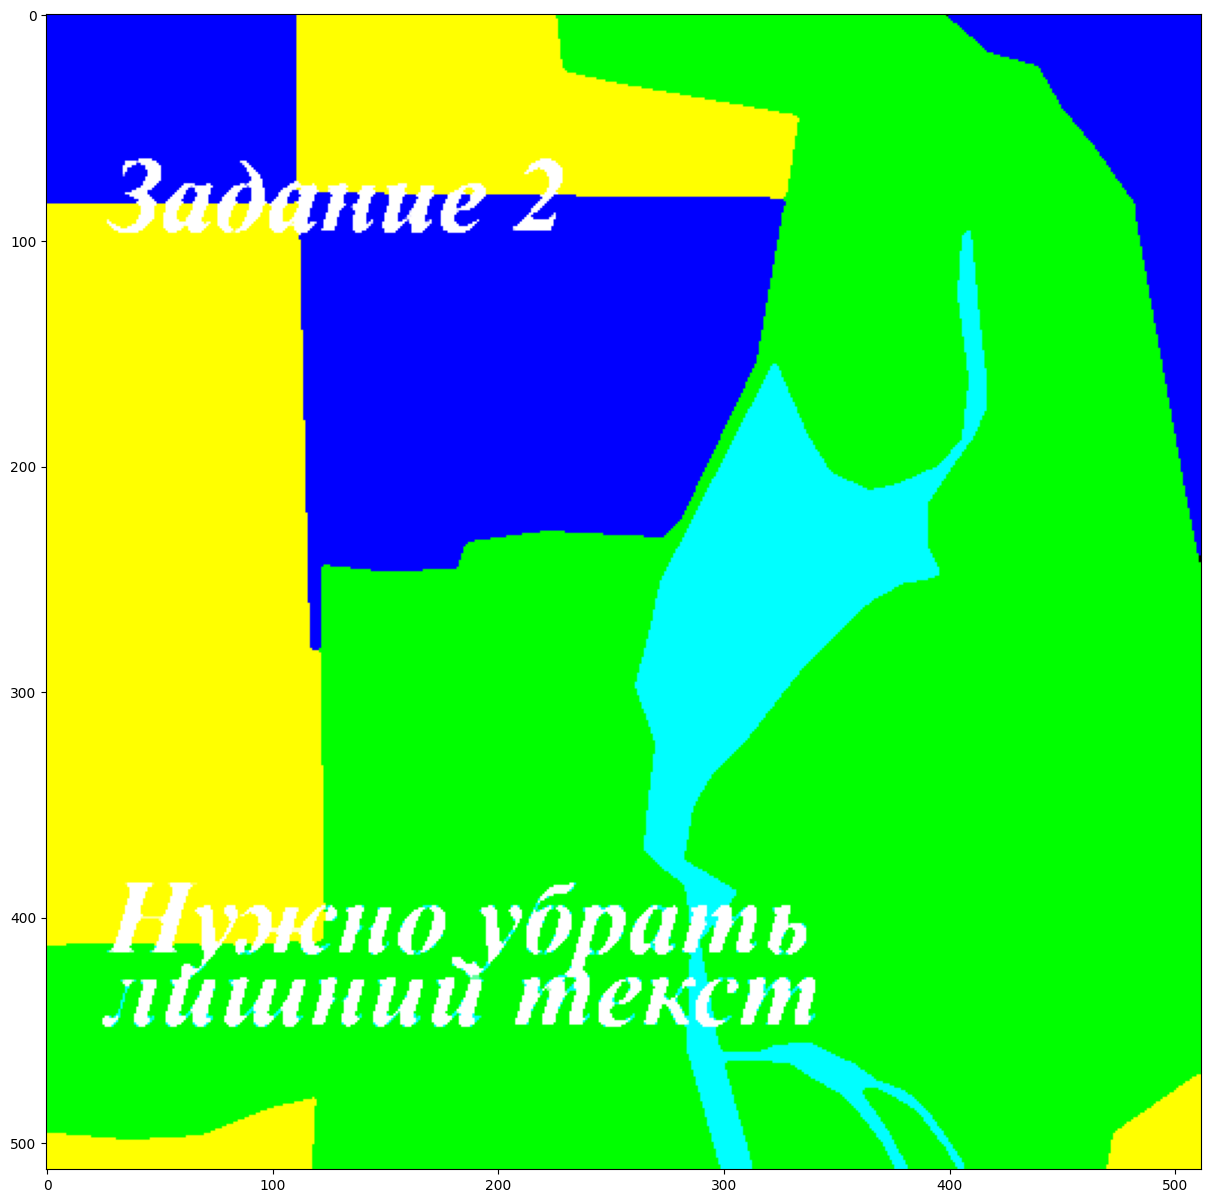

In [18]:
img2_filter = img_2.filter(ImageFilter.ModeFilter(size = 2))
np_img = np.array(img2_filter)

plt.figure(figsize=(15,15))
plt.imshow(np_img)

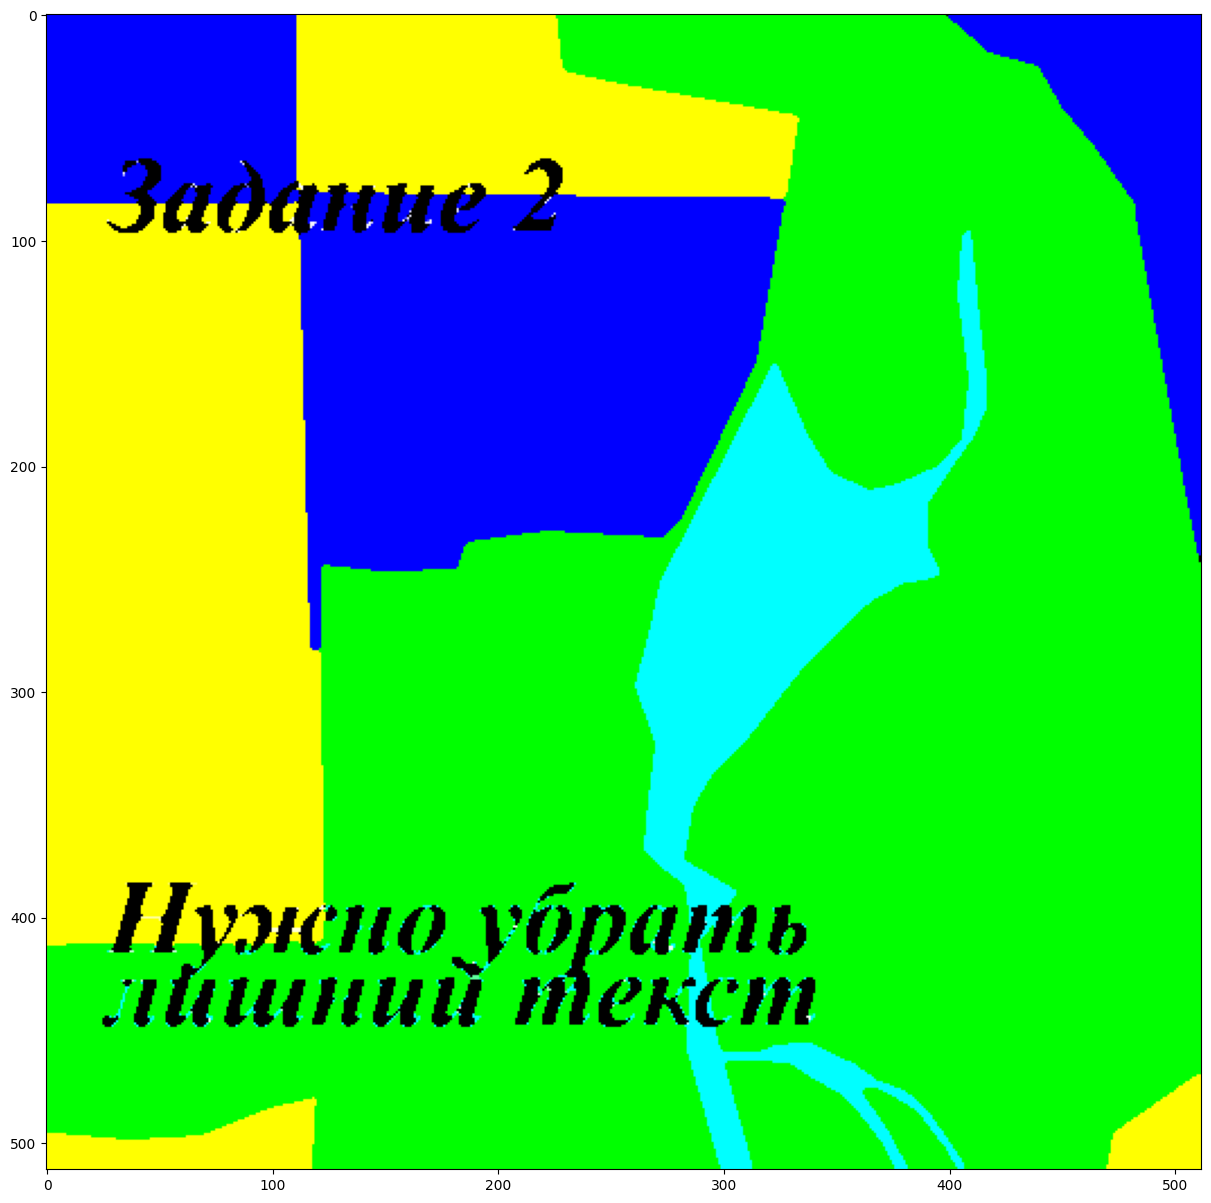

In [ ]:
x, y, z = np_img.shape
# print(np_img.shape)
img_2_copy = np.zeros_like((np_img))  # Подготавливаем массив для формирования результирующего изображения

# img_2_copy = np.where(np_img == (255, 255, 255), np.median(np_img[1:3, 2:5]), np_img)
# # for _ in range(2):
for i in range(x):
    for j in range(y):
        # img_2_copy = np.array(img_2_copy)
        r, g, b = np_img[i, j] #Получим значение цвета в RGB.
        # img_2_copy[i, j] = r, g, b
        if (r == 255) and (g == 255) and (b == 255): # в зависимости от выполнения заданных условий, в результирующем изображении пикселям происваиваются необходимые значения 
            # print(f'red: {r}\ngreen: {g}\nblue: {b}')
            # a, b, c = img_2_copy[i-1:i+2,j-1:j+2]
            for a in img_2_copy[i-1:i+2,j-1:j+2]:
                for b in a:
                    if (b[0] == 255 and b[1] == 255 and b[2] == 255) or (b[0] == 0 and b[1] == 0 and b[2] == 0):
                            # na = b
                            print(f'b: {b}\n')
            # a, b, c = (img_2_copy[i, j])
            # print(img_2_copy[i-1:i+2,j-1:j+2])
            # print((np_img[i-1:i+2,j-1:j+2]))
            # print(f'a: {a}\nb: {b}\nc: {c}\n')
            # if 
            # print('minimum')
            # print(np.minimum(a, np.minimum(b, c))[0])
            # img_2_copy[i, j] = (np.maximum(a, b)[0])
            # img_2_copy[i, j] = na

            # img_2_copy[i, j] = np.array(np.mean(a, b), dtype=np.int16)

        else:
            img_2_copy[i, j] = r, g, b

plt.figure(figsize=(15,15))
plt.imshow(img_2_copy)

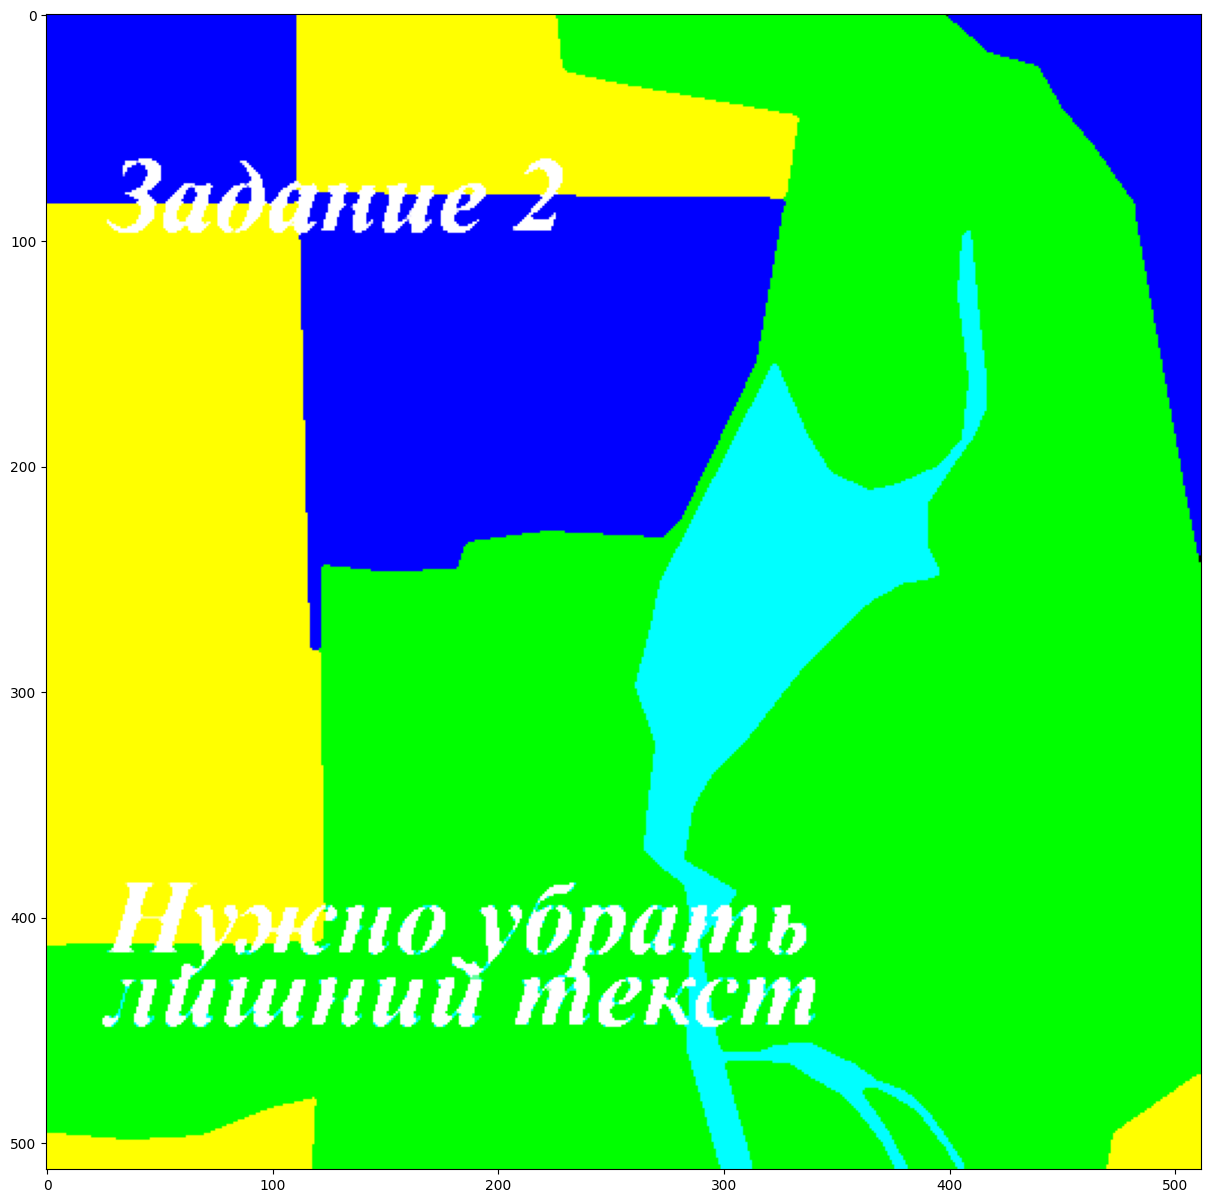

In [38]:
plt.figure(figsize=(15,15))
plt.imshow(np_img)

In [20]:
print(type(np.array(np.mean(a, b), dtype=np.int16)))


<class 'numpy.ndarray'>
